In [166]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2


import matplotlib.pyplot as plt
import numpy as np
import pycollocation

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:

x = np.linspace(0, 1, 11, dtype=float)
y = np.ones((2, len(x)), dtype=float)

def deriv(x, y):
    dz, u = y
    d_dz = -10 * u
    d_u = dz + u
    
    return np.array([d_dz, d_u], dtype=float)

def bc(ya, yb):
    dza, ua = ya
    dzb, ub = yb
    return np.array([dza - 2, dzb + ub], dtype=float)








# def rhs(A, T1, T2, U, **params):
#     return [-q(T1, T2, U), -0.5 * q(T1, T2, U)]

def rhs(x, dz, u, **params):
    d_dz = -10 * u
    d_u = dz + u
    
    return [d_dz, d_u]


def bc_lower(xa, dza, ua, **params):
    return [dza-2]

def bc_upper(xb, dzb, ub, **params):
    return [dzb+ub]





In [168]:
# pycollocation.problems.TwoPointBVP?

lower 0.0
0.09999999999999938
upper 1.0
lower 0.0
0.09999999999999938
upper 1.0
lower 0.0
0.09999999999999938
upper 1.0
lower 0.0
0.1000000014901155
upper 1.0
lower 0.0
0.09999999999999938
upper 1.0
lower 0.0
0.09999999999999938
upper 1.0
lower 0.0
0.09999999999999938
upper 1.0
lower 0.0
0.09999999999999938
upper 1.0
lower 0.0
0.09999999999999938
upper 1.0
lower 0.0
0.09999999999999938
upper 1.0
lower 0.0
0.09999999999999938
upper 1.0
lower 0.0
0.09999999999999938
upper 1.0
lower 0.0
0.09999999999999938
upper 1.0
lower 0.0
0.09999999999999938
upper 1.0
lower 0.0
0.09999999999999938
upper 1.0
lower 0.0
-46.175602257948356
upper 1.0
lower 0.0
97.70137049833343
upper 1.0
lower 0.0
0.1000000014901155
upper 1.0
lower 0.0
0.09999999999999938
upper 1.0
lower 0.0
0.09999999999999938
upper 1.0
lower 0.0
0.09999999999999938
upper 1.0
lower 0.0
0.09999999999999938
upper 1.0
lower 0.0
0.09999999999999938
upper 1.0
lower 0.0
0.09999999999999938
upper 1.0
lower 0.0
0.09999999999999938
upper 1.0
lowe

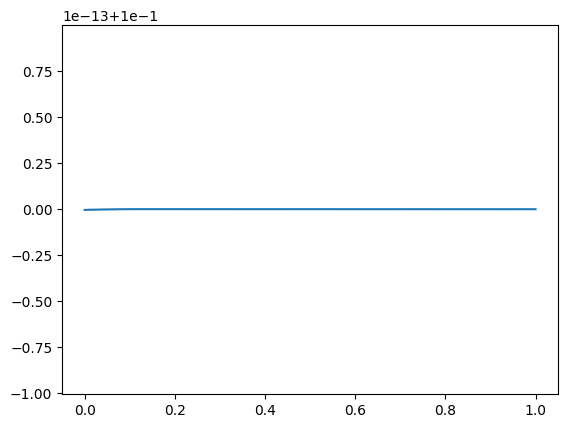

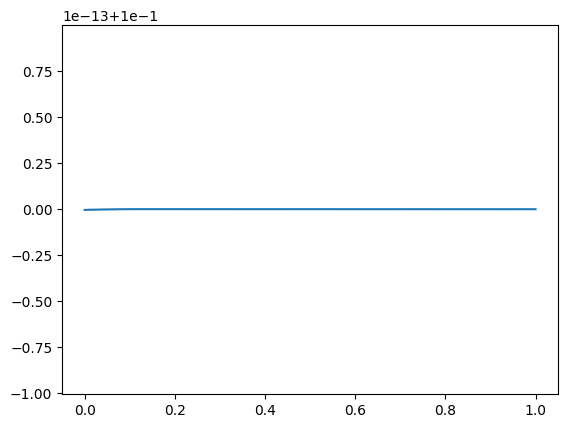

In [170]:
# problem = pycollocation.problems.TwoPointBVP(bcs_lower, bcs_upper, 1, 2, params, rhs)

problem = pycollocation.problems.TwoPointBVP(bc_lower, bc_upper, 1, 2, {}, rhs)



def initial_mesh(domain, num, problem):
    As = np.linspace(domain[0], domain[1], num)
    T1s = np.repeat(0.1, num)
    return As, T1s, T1s


polynomial_basis = pycollocation.basis_functions.PolynomialBasis()
solver = pycollocation.solvers.Solver(polynomial_basis)

basis_kwargs = {'kind': 'Chebyshev', 'domain': [0, 1.0], 'degree': 5}


As, T1s, T2s = initial_mesh(basis_kwargs['domain'], 1000, problem)
T1_poly = polynomial_basis.fit(As, T1s, **basis_kwargs)
T2_poly = polynomial_basis.fit(As, T2s, **basis_kwargs)
initial_coefs = np.hstack([T1_poly.coef, T2_poly.coef])


boundary_points = (0., 1.)
nodes = polynomial_basis.roots(**basis_kwargs)


solution = solver.solve(basis_kwargs, boundary_points, initial_coefs, nodes, problem)


T1_soln, T2_soln = solution.evaluate_solution(As)
plt.plot(As, T1_soln)
plt.show()
plt.plot(As, T2_soln)
plt.show()